In [6]:
import random
import numpy as np
import utilities
import function as fun

In [7]:
population_size = 10
domain =  [[[1,  500], 'int'], [[1, 100], 'int'], [[1, 500], 'int']]
max_generations = 10
crossover_probability = 0.9
mutation_probability = 0.5

In [8]:
population = utilities.initialize_population(population_size=population_size, domain=domain)
utilities.evaluate_population(population)
fitness = utilities.extrema(population, 'max').fitness
max_fitness = 0
iter = 0
while fitness > 0.6 and iter < 1:
    iter += 1
    new_population = utilities.initialize_population(population_size=population_size, domain=domain)
    utilities.evaluate_population(new_population)
    new_fitness = utilities.extrema(new_population, 'max').fitness
    # print(f'new_fitness: {new_fitness}')
    if new_fitness < fitness:
        population = new_population
        fitness = new_fitness
    else:
        max_fitness = new_fitness
    # print(f'iter: {iter}, fitness: {fitness}')

In [9]:
fitness

0.9029562982005142

In [10]:
max_fitness

0.9106683804627249

In [11]:
# initialize the population with 20 Points within the domain x1 ∈ [-15, -5], x2 ∈ [-3, 3].
# population = utilities.initialize_population(population_size=population_size, domain=domain)
# print value of population
for point in population:
    values = [str(individual.value) for individual in point.individuals]
    chromosomes = [str(individual.chromosome) for individual in point.individuals]
    print(" ".join(values), " ".join(chromosomes))


495 80 232 111101111. 1010000. 11101000.
343 43 105 101010111. 101011. 1101001.
325 17 428 101000101. 10001. 110101100.
174 20 403 10101110. 10100. 110010011.
203 80 384 11001011. 1010000. 110000000.
9 15 102 1001. 1111. 1100110.
305 89 420 100110001. 1011001. 110100100.
95 22 385 1011111. 10110. 110000001.
326 98 63 101000110. 1100010. 111111.
122 56 103 1111010. 111000. 1100111.


In [12]:
utilities.evaluate_population(population)
print(utilities.extrema(population, 'max').fitness)

0.9029562982005142


In [13]:
full_result = []

In [14]:
def genetic_algorithm(population, population_size, max_generations, crossover_probability, mutation_probability):
    utilities.evaluate_population(population)
    best_res = utilities.extrema(population, 'max')
    print(f"Original: {best_res.fitness}")

    result = []
    for generation in range(max_generations):
        new_population = []
        # select 10 best individual in the population to pass on the next generation
        # selection as option
        best_individuals = utilities.selection_fitness_ranking(population, 5, 'max')
        new_population.append(best_individuals[0])

        # create 10 by mutation 10 times
        for individual in best_individuals:
            mutation_result = utilities.mutation(individual, mutation_probability)
            if mutation_result is not None:
                new_population.append(mutation_result)

        # use the 5 best individuals to create 10 new individuals by crossover
        for i in range(population_size - len(new_population)):
            parent1 = random.choice(best_individuals)
            parent2 = random.choice(best_individuals)
            while parent2 == parent1:
                parent2 = random.choice(best_individuals)
            crossover_result = utilities.crossover(parent1, parent2, crossover_probability)
            if crossover_result is not None:
                new_population.extend(crossover_result)

        population = new_population
        # evaluate the fitness of each individual in the population
        utilities.evaluate_population(population)
        best_res = utilities.extrema(population, 'max')
        result.append(best_res.fitness)
        print(f"Generation {generation}: {best_res.fitness}")
        # for point in population:
        #     values = [str(individual.value) for individual in point.individuals]
        #     print(" ".join(values))
    return result

In [15]:
for i in range(10):
    full_result.append(genetic_algorithm(population, population_size, max_generations, crossover_probability, mutation_probability))

Original: 0.9029562982005142
Generation 0: 0.9029562982005142
Generation 1: 0.9029562982005142
Generation 2: 0.9029562982005142
Generation 3: 0.9029562982005142
Generation 4: 0.9029562982005142
Generation 5: 0.9029562982005142
Generation 6: 0.9029562982005142
Generation 7: 0.9029562982005142
Generation 8: 0.9029562982005142
Generation 9: 0.9029562982005142
Original: 0.9029562982005142
Generation 0: 0.9029562982005142
Generation 1: 0.9029562982005142
Generation 2: 0.9029562982005142
Generation 3: 0.9029562982005142
Generation 4: 0.9029562982005142
Generation 5: 0.9029562982005142
Generation 6: 0.9029562982005142
Generation 7: 0.9029562982005142
Generation 8: 0.9029562982005142
Generation 9: 0.9029562982005142
Original: 0.9029562982005142
Generation 0: 0.9029562982005142
Generation 1: 0.9029562982005142
Generation 2: 0.9029562982005142
Generation 3: 0.9029562982005142
Generation 4: 0.9029562982005142
Generation 5: 0.9029562982005142
Generation 6: 0.9029562982005142
Generation 7: 0.902956

KeyboardInterrupt: 

In [ ]:
full_result = {
    "Original": 0.6177673874926943,
    "Generation 0": 0.722969023962595,
    "Generation 1": 0.7247223845704267,
    "Generation 2": 0.7247223845704267,
    "Generation 3": 0.7247223845704267,
    "Generation 4": 0.7247223845704267,
    "Generation 5": 0.7247223845704267,
    "Generation 6": 0.7247223845704267,
    "Generation 7": 0.7247223845704267,
    "Generation 8": 0.7247223845704267,
    "Generation 9": 0.7247223845704267
}

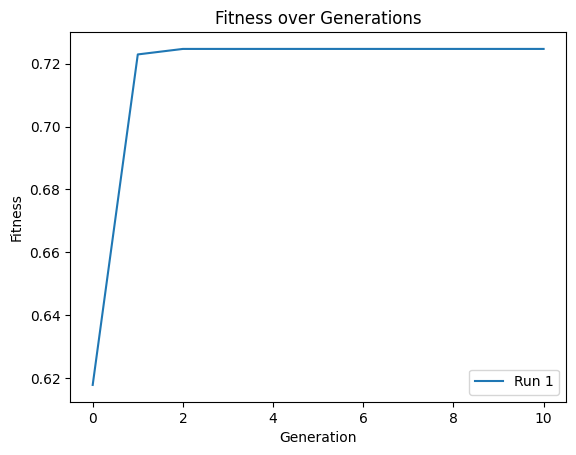

In [ ]:
import matplotlib.pyplot as plt

# Extract the fitness values from the dictionary
fitness_values = list(full_result.values())

# Plot the result over generations
plt.plot(fitness_values, label='Run 1')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness over Generations')
plt.legend()
plt.show()

In [ ]:
fun.grid_search(domain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/lap14632/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END max_depth=99, min_samples_split=83, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_split=52, n_estimators=115; total time=   0.1s
[CV] END max_depth=99, min_samples_split=83, n_estimators=100; total time=   0.1s
[CV] END max_depth=99, min_samples_split=83, n_estimators=100; total time=   0.1s
[CV] END max_depth=99, min_samples_split=83, n_estimators=100; total time=   0.1s
[CV] END max_depth=99, min_samples_split=83, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_split=52, n_estimators=115; total time=   0.1s
[CV] END max_depth=18, min_samples_split=52, n_estimators=115; total time=   0.1s
[CV] END max_depth=18, min_samples_split=52, n_estimators=115; total time=   0.1s
[CV] END max_depth=10, min_samples_split=448, n_estimators=104; total time=   0.2s
[CV] END max_depth=10, min_samples_split=448, n_estimators=104; total time=   0.2s
[CV] END max_depth=10, min_samples_split=448, n_estimators=104; total time=   0.2s
[CV] END max_

0.700759789596727

- Tìm dataset khó hơn để start xấu hơn
- Box plot so sánh giữa các phương pháp qua các score
- Thêm nhiều score hơn
- Hypothesis testing